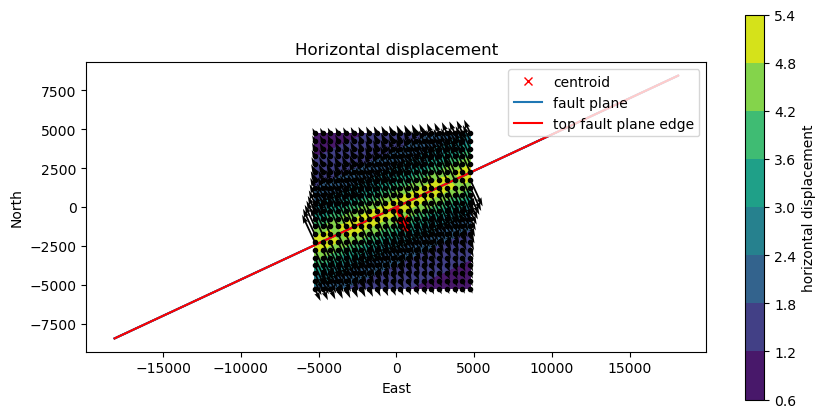

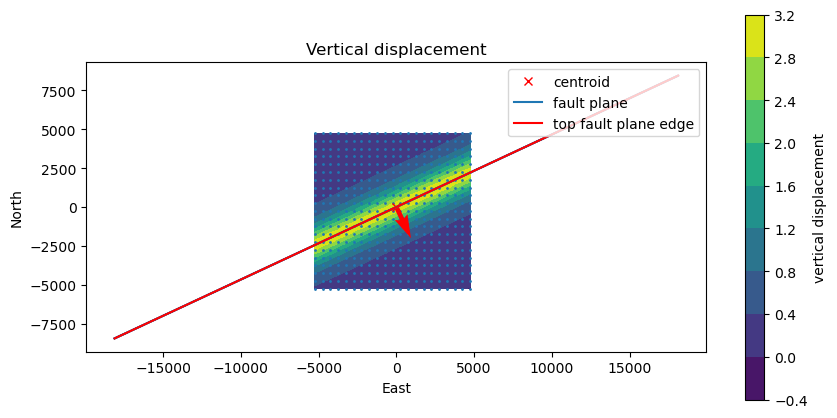

In [33]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on february 2021

@author: Phil Vernant philippe.vernant@umontpellier.fr
"""

# import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from okada85 import *

# Oen dislocation model
# We use Okada85 with the following parameters :
#   [uE,uN,uZ] = OKADA85(E,N,prof,azim,dip,long,larg,rake,glis,ouv)
#
#   E,N    : coordinates of the surface points wehre the displacement will eb computed
#               the reference is the dislocation centroid
#   prof   : depth of the centroid (positive)
#   azim   : azimuth of the dislocation (0 to 360° relative to the North), the dip of the dislocation  
#               is at 90˚ to the right of the dislocation direction 
#   dip    : dip of the dislocation (0 to 90°)
#   long   : length of the dislocation
#   larg   : width of the dislocation
#   rake   : direction of the displacement of the hanging wall block relative to the dislocation direction (-180 to 180°).
#   glis   : displacement along the dislocation plan
#   ouv    : opening of closing normal to the dislocation
#
#   provides the following values :
#   uN,uE,uZ        : displacements in units of the input displacement/opening
#
#   exemples : 
#      dip=90, rake=0   : left lateral strike slip
#      dip=90, rake=180 : right lateral strike slip
#      dip=70, rake=90  : reverse fault
#      dip=70, rake=-90 : normal fault
#

# compute displacements for a vertical dislocation with an opening of 10 units
d2r = np.pi/180
azim =  65
dip  = 90
long = 40000
larg = 1000
rake = -90
glis = 0
ouv  = 10
prof =  larg/2 * np.sin(dip*d2r) + 0.1 # calcul de la profondeur pour que la dislocation arrive à la surface
# coordonnées extrémités dislocation
alpha = np.pi/2 - (azim*d2r)
Xf = long/2*np.cos(alpha)*np.array([-1,1,1,-1]) + np.sin(alpha)*np.cos(dip*d2r)*larg/2*np.array([-1,-1,1,1])
Yf = long/2*np.sin(alpha)*np.array([-1,1,1,-1]) + np.cos(alpha)*np.cos(dip*d2r)*larg/2*np.array([1,1,-1,-1])

X = np.arange(-5250,5250,500) 
Y = np.arange(-5250,5250,500) 
X,Y = np.meshgrid(X,Y) # création de la grille à partir des vecteurs X et Y
(Ue,Un,Uz)=okada85(X,Y,prof,azim,dip,long,larg,rake,glis,ouv)

# Plots
#fg = plt.figure(figsize=(10,6))
##plt.plot(X,Y,'k.')
##plt.plot(Xf[0:2],Yf[0:2],'-r',linewidth=4)
#plt.plot(append(Xf,Xf[0]),append(Yf,Yf[0]),label="fault plane")
#plt.plot(Xf[0:2],Yf[0:2],'r-',label="top fault plane edge")
#q = quiver(X,Y,Ue,Un,units='width',color='g',width=0.005
#quiverkey(q, X=0.2, Y=0.1, U=1, label='1m', labelpos='E', coordinates = 'axes')
#axis('scaled')
#xlabel('East')
#ylabel('North')
##legend(loc='upper right')
#title("Horizontal displacement")
plt.show()
